In [1]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Step 1:  Load the dataset

The dataset is based on lung sample data. We will be using this dataset to perform our training and testing.

In [2]:
# Load the dataset on our working directory
lung1 = pd.read_csv("GSE87340.csv.zip")
lung2 = pd.read_csv("GSE60052.csv.zip")
lung3 = pd.read_csv("GSE37764.csv.zip")

# Concatenate the dataset
con_lungData = pd.concat([lung1, lung2, lung3])

In [3]:
# Obtain quick overview of the concatenated dataset: First 5 rows and 10 columns.
con_lungData.iloc[:,0:10].head()

,ID,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036
0,SRR4296063,Normal,10.728260,4.668142,10.278195,10.184036,8.215333,11.310861,13.178872,11.469473
1,SRR4296064,Tumor,11.332606,2.329988,10.127734,10.167900,8.174060,10.399611,13.208972,11.510862
2,SRR4296065,Normal,9.951182,4.264426,10.288874,10.093258,8.011385,11.814572,14.038661,11.651766
3,SRR4296066,Tumor,12.185680,2.798643,10.178582,10.401606,8.902321,10.294009,13.170466,11.546855
4,SRR4296067,Normal,9.875179,2.922071,10.444479,10.435843,8.692961,12.604934,13.538341,11.733252


The **ID** shown above indicates the origin of the sample. <br>
The **class** determine whether the sample is normal or tumor. <br>
The **rest of the columns** indicate gene expression values for each sample. <br>

### Step 2: Pre-process the data
In this section, we will perform data cleaning(wrangling), removing certain outliers and missing values.

In [5]:
# Check on missing data
con_lungData.isna().sum().sum()

0

Based on the result shown above, we see no missing(NA) values.

### Step 3: Perform EDA (Exploratory Data Analysis)

In [6]:
# Check the property of the dataset. Notice here we also convert the dataset into a dataframe for easy processing.
lungdf = con_lungData['class'].value_counts().reset_index()
lungdf

,index,class
0,Tumor,104
1,Normal,33
2,Normal,6
3,Tumor,6


Based on table shown above, we can a total numbers of tumor and normal on each ID.

Text(0, 0.5, 'Class')

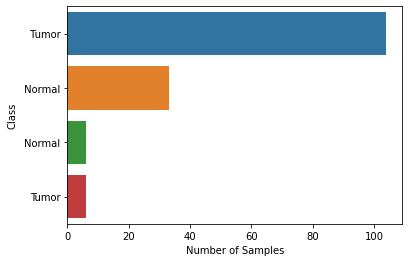

In [7]:
# Here we utilize seaborn and matplotlib to visualize our current dataset
sns.barplot(x = "class", y = "index", data=lungdf)
plt.xlabel("Number of Samples")
plt.ylabel("Class")

In [9]:
# Check different classes closely
set(con_lungData['class'])
{' Normal', ' Tumor', 'Normal', 'Tumor'}

{' Normal', ' Tumor', 'Normal', 'Tumor'}

In [10]:
# Fix data duplication so there will only be Normal and Tumor.
con_lungData['class'] = con_lungData['class'].replace(' Normal','Normal')
con_lungData['class'] = con_lungData['class'].replace(' Tumor', 'Tumor')

Text(0, 0.5, 'Class')

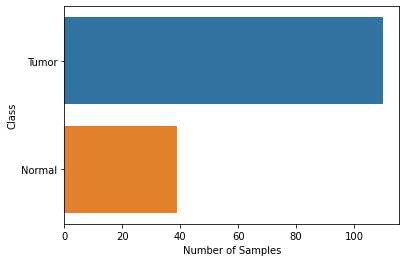

In [11]:
# Visualize the distribution one more time with the adjustment
# Here we utilize seaborn and matplotlib to visualize our current dataset
lungdf2 = con_lungData['class'].value_counts().reset_index()
sns.barplot(x = "class", y = "index", data=lungdf2)
plt.xlabel("Number of Samples")
plt.ylabel("Class")

### Step 4: Data transformation
This step is to ensure there are no issues/anomalies present during data collection.

In [12]:
# Apply melt
con_lungData_m = pd.melt(con_lungData.iloc[:,1:12], id_vars = "class")

Text(0, 0.5, 'Expression')

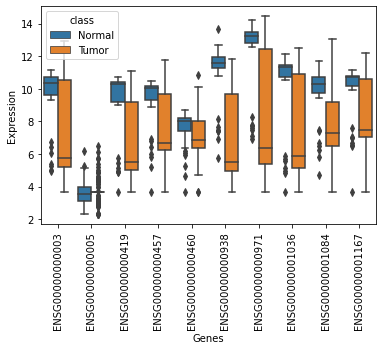

In [13]:
# Apply seaborn for visualization
ax = sns.boxplot(x = "variable", y = "value", data = con_lungData_m, hue = "class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Genes")
plt.ylabel("Expression")

Based on the result shown above, our dataset seems to be normalized so further normalization is not required.

### Step 5: Data Splitting/Partitioning

In this section, we will start dividing the dataset for training and testing.

In [14]:
# Use scikit-learn to implement data partitioning.
# 75:25 ratio is used where 75 is for training and 25 for testing.

# Drop ID and class columns in the dataset. Conver it to a NumPy ndarray:
x_data = con_lungData.drop(['class', 'ID'], axis = 1).values

# Create a NumPy ndarray for the labels from the subset data. We focus on class because this will be our target variable:
y_data = con_lungData['class'].values

In [15]:
# Apply one-hot encoding for the target feature
classes = con_lungData['class'].unique().tolist()

# Check our adjustment
classes

['Normal', 'Tumor']

In [16]:
# Convert classes into ordinals
func = lambda x: classes.index(x)
y_data = np.asarray([func(i) for i in y_data], dtype = "float32")

In [17]:
# Check adjustment
y_data

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.], dtype=float32)

Based on the result shown above, we have successfully converted "Tumor" and "Normal" to one-hot encoding where 0 refer to Normal and 1 refer to Tumor.

In [18]:
# Import necessary module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test: random_state is just like seed so that it gives us same result when
# shuffled. Stratify means to make sure the algorithm follows our customized ratio.
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 42, test_size = 0.25, stratify = y_data)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111, 58735), (38, 58735), (111,), (38,))

Based on the results shown above, we can see that our train and test data are the same.

### Step 6: Train Model
Logistic regression concept is used in this model.

In [19]:
model_lung1 = LogisticRegression()
# Use the logistic regression model to fit the training dataset
model_lung1.fit(X_train, y_train)

/Users/virly/opt/anaconda3/envs/ML-Genomics/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Step 7: Evaluate Model

In [20]:
# Run the trained model on the test data
pred = model_lung1.predict(X_test[12].reshape(1,-1))
pred

array([1.], dtype=float32)

Based on our prediction, we got .1 referring to tumor.

In [22]:
# Apply the trained model to predict all features
all_pred_lung = model_lung1.predict(X_test)

# Check result with accuracy score
print(model_lung1.score(X_test, y_test))

0.9736842105263158


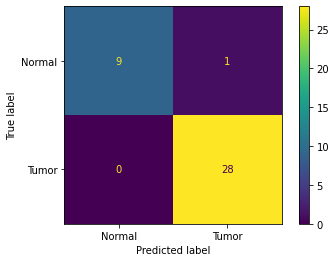

In [23]:
# Apply confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, all_pred_lung)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Normal", "Tumor"])
disp.plot()
plt.show()

Based on the evaluation shown above, Confusion Matrix evaluation shows 1 FP which makes our model quite accurate.

In [24]:
# Apply classification report to measure accuracy test
classification_report(y_test, all_pred_lung)

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.90      0.95        10\n         1.0       0.97      1.00      0.98        28\n\n    accuracy                           0.97        38\n   macro avg       0.98      0.95      0.96        38\nweighted avg       0.97      0.97      0.97        38\n'